In [6]:
#Trabalhando com Planilhas do Excel

In [7]:
import pandas as pd

In [8]:
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [9]:
df = pd.concat([df1, df2, df3, df4, df5])

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
235,Natal,2019-01-03,41.84,1034,1
13,Natal,2018-09-12,458.00,852,4
113,Recife,2019-03-02,38.63,980,2
142,Natal,2019-01-02,7.12,1034,1
115,Natal,2019-01-02,202.33,1035,2


In [14]:
df['LojaID'] = df['LojaID'].astype('object')

In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [16]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
#Substituindo os valores nulos pela média
#O parâmetro inplace=True vai fazer essa alteração em memória, não só na linha de código
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [19]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [20]:
#Criando novas colunas

In [21]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [25]:
df['Receita'].max()

3544.0

In [26]:
df['Receita'].min()

3.34

In [27]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [28]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [29]:
#Agrpamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [30]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [31]:
#Trabalhando com datas

In [32]:
#Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [34]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [35]:
df['Data'] = pd.to_datetime(df['Data'])

In [36]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [37]:
#Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [38]:
#Criar coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
50,Salvador,2019-01-01,44.87,1036,3,134.61,3.0,2019
216,Natal,2019-01-02,5.82,1035,1,5.82,1.0,2019
154,Natal,2019-01-02,9.58,1037,1,9.58,1.0,2019
101,Salvador,2019-01-01,32.28,1035,3,96.84,3.0,2019
48,Natal,2018-09-20,676.00,852,4,2704.00,4.0,2018


In [40]:
#Extraindo o mês e o dia
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
108,Aracaju,2018-01-01,31.94,1520,8,255.52,8.0,2018,1,1
16,Recife,2019-01-01,19.95,980,8,159.60,8.0,2019,1,1
70,Salvador,2019-01-01,39.06,1034,3,117.18,3.0,2019,1,1
113,Natal,2019-01-02,18.90,1034,3,56.70,3.0,2019,1,2
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2


In [45]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [46]:
#Calculando a diferença de dias
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
10,Natal,2018-10-27,828.00,852,4,3312.00,4.0,2018,10,27,299 days
229,Natal,2019-01-02,43.08,1036,2,86.16,2.0,2019,1,2,366 days
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days
83,Natal,2019-01-02,63.66,1036,2,127.32,2.0,2019,1,2,366 days
126,Natal,2019-01-02,41.69,1036,2,83.38,2.0,2019,1,2,366 days


In [51]:
#Criando a coluna de trimestre
df["Trimestre_Venda"] = df['Data'].dt.quarter

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
152,Salvador,2019-01-02,20.07,1035,1,20.07,1.0,2019,1,2,366 days,1
33,Aracaju,2018-01-01,35.09,1523,4,140.36,4.0,2018,1,1,0 days,1
34,Salvador,2019-01-01,36.54,1037,3,109.62,3.0,2019,1,1,365 days,1
64,Natal,2019-02-22,704.00,853,4,2816.00,4.0,2019,2,22,417 days,1
232,Salvador,2019-01-03,167.76,1034,3,503.28,3.0,2019,1,3,367 days,1


In [53]:
#Filtrando as vendas de 2019 no mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [55]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,20,443 days,1
135,Recife,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2.0,2019,3,2,425 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1


In [56]:
#Visualização de dados

In [57]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

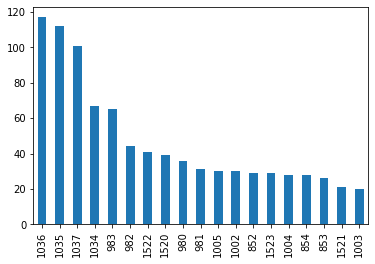

In [58]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

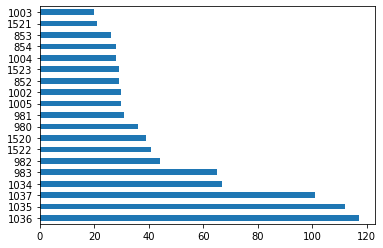

In [59]:
#Gráfico de barras horizontais
df['LojaID'].value_counts().plot.barh()

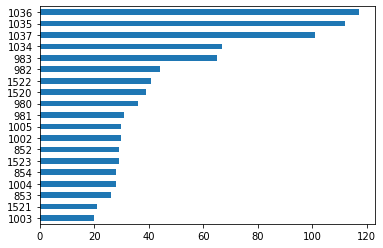

In [61]:
#Gráfico de barras horizontais
#Com o ponto e vírgula no final não fica aquela linha em cima do gráfico
df['LojaID'].value_counts(ascending=True).plot.barh();

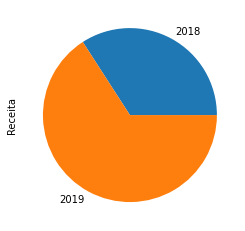

In [63]:
#Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [64]:
#Total vendas por cidade (?)
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

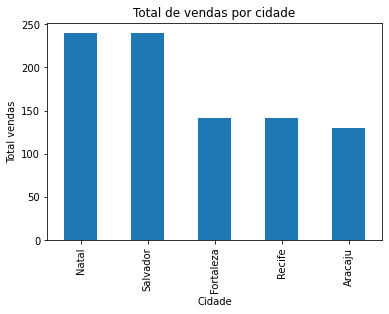

In [66]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

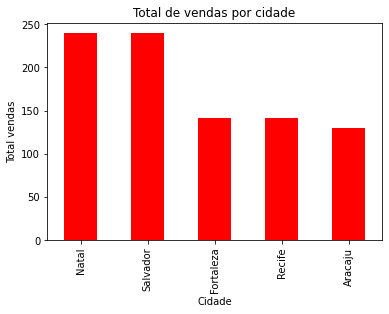

In [73]:
#Adicionando a cor
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [74]:
#Alterando o estilo
plt.style.use('ggplot')

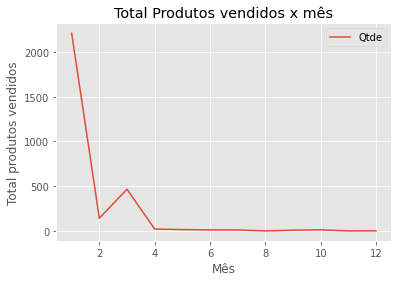

In [76]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total Produtos vendidos x mês')
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()

In [77]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [78]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

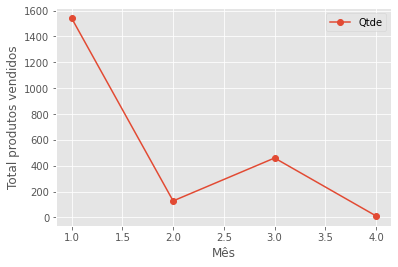

In [84]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

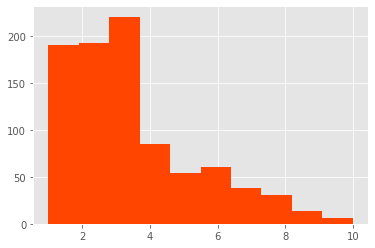

In [87]:
#Histograma
plt.hist(df['Qtde'], color='orangered');

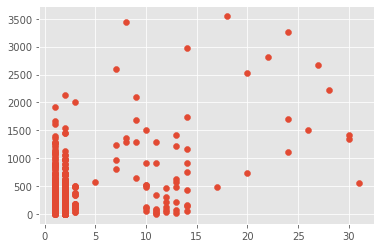

In [88]:
plt.scatter(x=df_2019['Dia_Venda'], y=df_2019['Receita']);

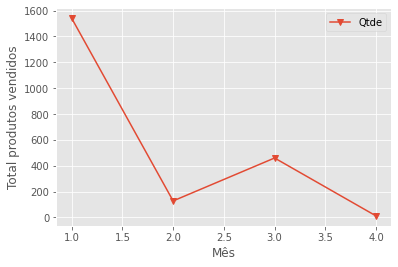

In [89]:
#Salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='v')
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("Gráfico QTDE x MES.png")